# Capstone Two EDA
  Here we shall begin a deeper investigation into the data that has previously been cleaned.

  The cleaned data that we are analyzing is a pseudo-random selection of comments and posts from the WallStreetBets subreddit community. This data has been preprocessed to normalize the data and provide our resultant models with the ability to extract the most insight from the data.

  Things that we shall look into with this data set are as follows:
  - frequency of words by length
  - frequency of post/comment length
  - word frequency
  - post/comment sentiment analysis

  Additionally, there is an added temporal component to the data, and as such we shall be doing an added Time series analysis on the data:
  - daily and monthly post/comment rates
  - daily and monthly averages of sentiment scores.




In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns
import datetime as dt
import pathlib
import re

from collections import Counter, OrderedDict
from wordcloud import wordcloud
from textblob import TextBlob
from ast import literal_eval
from nltk.probability import FreqDist


In [3]:
cwd = pathlib.Path.cwd()
gd_loc = cwd / 'gdrive/My Drive'

In [4]:
df_training = pd.read_csv(gd_loc/'preprocessed_training.csv', index_col=0, converters={'preprocessed':literal_eval})

/usr/local/lib/python3.7/dist-packages/numpy/lib/arraysetops.py:580: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


In [5]:
df_training.head()

,id,dt,thetype,body,tri_grams,preprocessed
0,k4wehp,2020-12-01 23:59:48,post,"['diamond', 'hands', 'on', 'chinese', 'evs', '...",diamond_hands chinese evs senate bill likely p...,"[bill, likely, pass, good, thing, good, thing,..."
2,k4wehp,2020-12-02 00:09:20,comment,"['cancelled', 'my', 'orders', 'withdrawing', '...",cancelled orders withdrawing initial_investmen...,"[cancel, order, withdraw, be, fucking, scare, ..."
3,k4wehp,2020-12-02 00:13:57,comment,"['the', 'main', 'issue', 'is', 'that', 'everyo...",main issue everyone selling tomorrow almost gu...,"[main, issue, sell, tomorrow, almost, guarante..."
4,k4wehp,2020-12-02 00:15:15,comment,"['agree', 'that', 'it', 'will', 'take', 'time'...",agree take time delisting even occurs regulati...,"[agree, take, time, delist, even, occur, regul..."
5,k4wehp,2020-12-02 00:15:48,comment,"['im', 'deciding', 'that', 'as', 'well', 'dont...",im deciding well dont like idea selling stock,"[be, decide, well, like, idea, sell, stock]"


In [6]:
df_training.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2193797 entries, 0 to 2311515
Data columns (total 6 columns):
 #   Column        Dtype 
---  ------        ----- 
 0   id            object
 1   dt            object
 2   thetype       object
 3   body          object
 4   tri_grams     object
 5   preprocessed  object
dtypes: object(6)
memory usage: 117.2+ MB


In [7]:
#getting rid of unnecessary features

In [8]:
df_training = df_training[['id','dt','thetype','preprocessed']]

In [9]:
df_training.thetype.astype('category')
df_training['dt'] = pd.to_datetime(df_training['dt']).dt.date

In [10]:
df_validation = pd.read_csv(gd_loc/'preprocessed_validation.csv', index_col=0, converters={'preprocessed':literal_eval})

In [11]:
df_validation.head()

,id,dt,thetype,body,tri_grams,preprocessed
0,laguph,2021-02-01 23:59:37,post,"['amazing', 'news', 'to', 'see', 'the', 'big',...",amazing news see big guns siding us hold line,"[amazing, news, see, big, gun, side, hold, line]"
1,lagu8d,2021-02-01 23:59:01,post,"['why', 'is', 'gme', 'going', 'down', 'listen'...",gme going listen weak hearted people sell amc ...,"[go, listen, weak, hearted, people, sell, amc,..."
2,lagu6e,2021-02-01 23:58:57,post,"['short', 'seller', 'andrew', 'left', 'attacki...",short seller andrew_left attacking covid compa...,"[short, seller, attack, covid, company, try, l..."
3,lagtxo,2021-02-01 23:58:38,post,"['is', 'it', 'possible', 'to', 'ladder', 'up']",possible ladder,"[possible, ladder]"
4,lagtd0,2021-02-01 23:57:59,post,"['what', 'happening', 'with', 'gme']",happening gme,[happen]


In [12]:
df_validation.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 282443 entries, 0 to 318375
Data columns (total 6 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            282443 non-null  object
 1   dt            282443 non-null  object
 2   thetype       282443 non-null  object
 3   body          282443 non-null  object
 4   tri_grams     277850 non-null  object
 5   preprocessed  282443 non-null  object
dtypes: object(6)
memory usage: 15.1+ MB


In [13]:
df_validation.thetype.astype('category')
df_validation['dt'] = pd.to_datetime(df_validation['dt']).dt.date

In [14]:
df_validation = df_validation[['id','dt','thetype','preprocessed']]

In [15]:
def get_word_count(column):
  """gets length of lists stored in a pandas DataFrame column"""
  result = [len(item) for item in column]
  return result

def get_word_lengths(column):
  result = [[len(word) for word in sentence] for sentence in column]
  return result

## Sentence lengths by type:
  First I will look at both data sets and plot the distribution of sentence lengths:
  - histogram
  - boxplot

### training dataset:

In [16]:
df_training.head()

,id,dt,thetype,preprocessed
0,k4wehp,2020-12-01,post,"[bill, likely, pass, good, thing, good, thing,..."
2,k4wehp,2020-12-02,comment,"[cancel, order, withdraw, be, fucking, scare, ..."
3,k4wehp,2020-12-02,comment,"[main, issue, sell, tomorrow, almost, guarante..."
4,k4wehp,2020-12-02,comment,"[agree, take, time, delist, even, occur, regul..."
5,k4wehp,2020-12-02,comment,"[be, decide, well, like, idea, sell, stock]"


In [17]:
df_training['num_words'] = get_word_count(df_training.preprocessed.values)
df_training['word_lens'] = get_word_lengths(df_training.preprocessed.values)

In [18]:
df_training['dt'] = pd.to_datetime(df_training['dt'])

In [19]:
df_training = df_training[df_training.dt <= '2020-12-01'] #woops

In [20]:
df_training.head()

,id,dt,thetype,preprocessed,num_words,word_lens
0,k4wehp,2020-12-01,post,"[bill, likely, pass, good, thing, good, thing,...",67,"[4, 6, 4, 4, 5, 4, 5, 7, 7, 6, 10, 4, 6, 5, 4,..."
23,k4w6of,2020-12-01,post,"[retard, ban, discord]",3,"[6, 3, 7]"
24,k4w5xc,2020-12-01,post,"[move, tomorrow, good, tomorrow, guy, buy]",6,"[4, 8, 4, 8, 3, 3]"
25,k4w5xc,2020-12-01,comment,"[sit, sideline, get, fuck, last, day]",6,"[3, 8, 3, 4, 4, 3]"
26,k4w5xc,2020-12-01,comment,"[day, last, probably, rope]",4,"[3, 4, 8, 4]"


In [21]:
sns.set_theme(style='darkgrid')

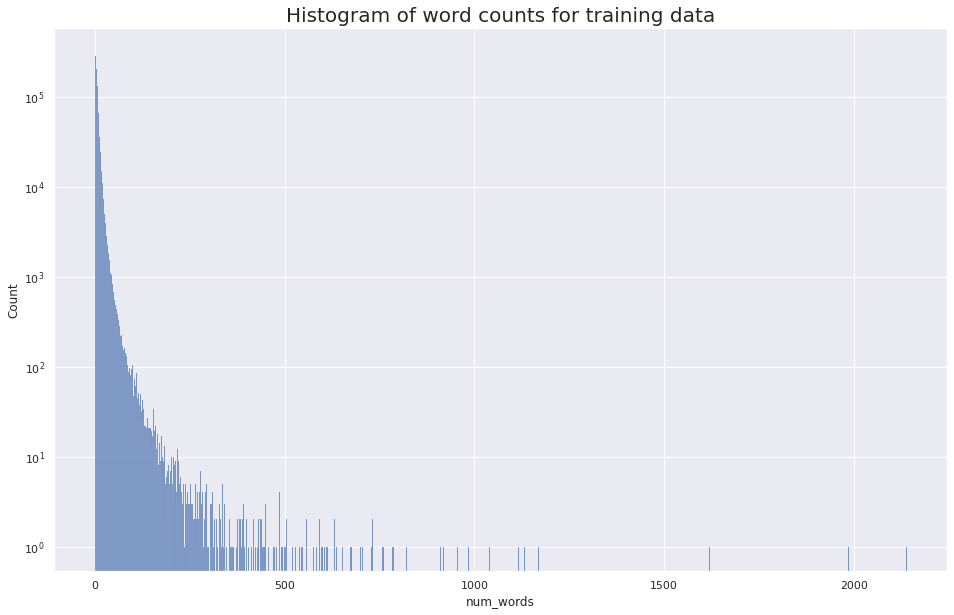

In [22]:
_, ax = plt.subplots(1,1,figsize=(16,10))

_ = sns.histplot(data = df_training, x = 'num_words',ax = ax, binwidth=1)
ax.set_yscale('log')
ax.set_title('Histogram of word counts for training data', fontsize=20)
plt.show()

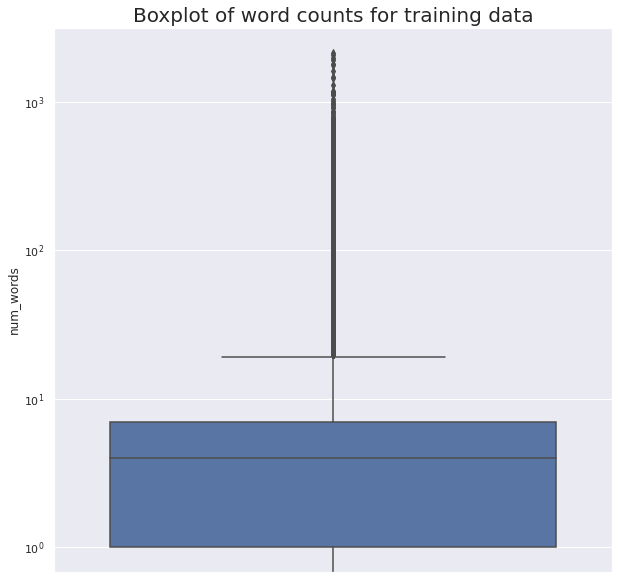

In [23]:
_, ax = plt.subplots(1,1,figsize=(10,10))

_ = sns.boxplot(data = df_training, y = 'num_words', ax = ax, whis=2)
ax.set_yscale('log')
ax.set_title('Boxplot of word counts for training data', fontsize=20)
plt.show()

In [24]:
for i in range(11):
  print(f"Percent of items with length={i}:",f"{df_training[df_training.num_words ==i].id.count()/df_training.shape[0]:.2%}")

Percent of items with length=0: 14.09%
Percent of items with length=1: 12.80%
Percent of items with length=2: 11.81%
Percent of items with length=3: 10.82%
Percent of items with length=4: 9.19%
Percent of items with length=5: 7.40%
Percent of items with length=6: 5.92%
Percent of items with length=7: 4.69%
Percent of items with length=8: 3.75%
Percent of items with length=9: 3.02%
Percent of items with length=10: 2.43%


In the training data set ~14% of the posts have been fully removed due to the removal of stopwords as well as through the lemmatization process--removing proper nouns. With the ultimate goal of modeling the topics from this random selection of posts these will be removed from the dataset altogether.

### validation dataset:

In [25]:
df_validation['num_words'] = get_word_count(df_validation.preprocessed.values)
df_validation['word_lens'] = get_word_lengths(df_validation.preprocessed.values)

In [26]:
df_validation['dt'] = pd.to_datetime(df_validation['dt'])

In [27]:
df_validation = df_validation[(df_validation.dt >= '2020-12-02') & (df_validation.dt <'2021-02-02')] #woops woops

In [28]:
df_validation.head()

,id,dt,thetype,preprocessed,num_words,word_lens
0,laguph,2021-02-01,post,"[amazing, news, see, big, gun, side, hold, line]",8,"[7, 4, 3, 3, 3, 4, 4, 4]"
1,lagu8d,2021-02-01,post,"[go, listen, weak, hearted, people, sell, amc,...",8,"[2, 6, 4, 7, 6, 4, 3, 3]"
2,lagu6e,2021-02-01,post,"[short, seller, attack, covid, company, try, l...",12,"[5, 6, 6, 5, 7, 3, 4, 3, 5, 4, 7, 5]"
3,lagtxo,2021-02-01,post,"[possible, ladder]",2,"[8, 6]"
4,lagtd0,2021-02-01,post,[happen],1,[6]


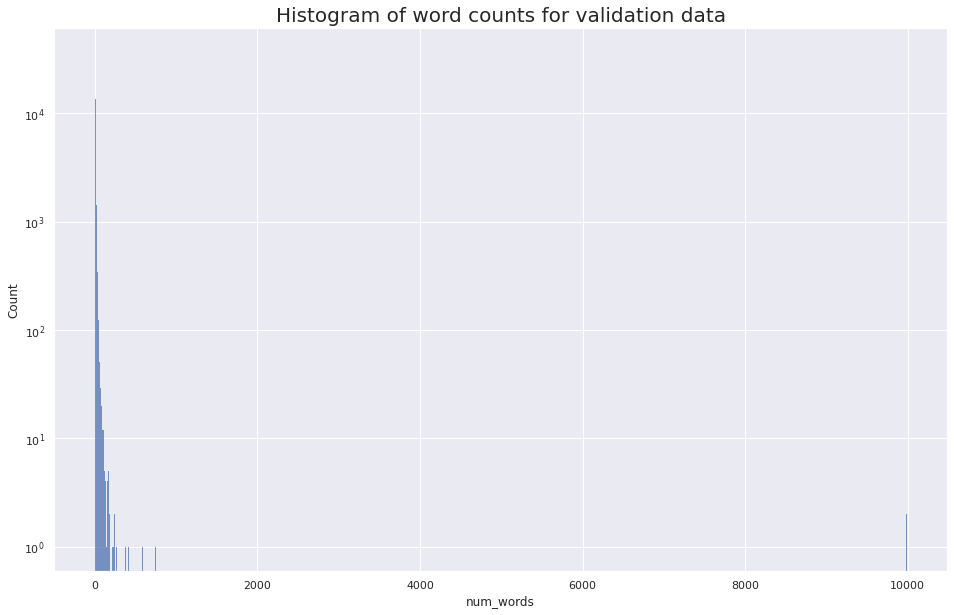

In [29]:
_, ax = plt.subplots(1,1,figsize=(16,10))

_ = sns.histplot(data = df_validation, x = 'num_words',ax = ax, binwidth=1)
ax.set_yscale('log')
ax.set_title('Histogram of word counts for validation data', fontsize=20)
plt.show()

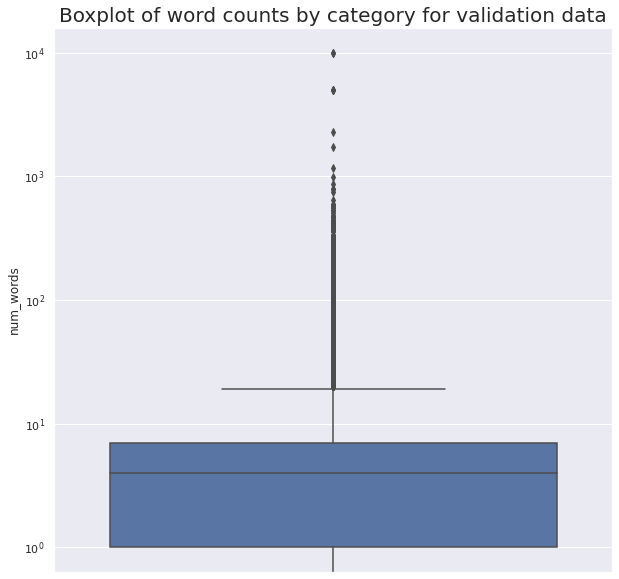

In [30]:
_, ax = plt.subplots(1,1,figsize=(10,10))

_ = sns.boxplot(data = df_validation, y = 'num_words', ax = ax, whis=2)
ax.set_yscale('log')
ax.set_title('Boxplot of word counts by category for validation data', fontsize=20)
plt.show()

In [31]:
for i in range(10):
  print(f"Percent of items with length={i}:",f"{df_validation[df_validation.num_words ==i].id.count()/df_validation.shape[0]:.2%}")

Percent of items with length=0: 12.97%
Percent of items with length=1: 12.76%
Percent of items with length=2: 11.84%
Percent of items with length=3: 11.00%
Percent of items with length=4: 9.27%
Percent of items with length=5: 7.50%
Percent of items with length=6: 6.00%
Percent of items with length=7: 4.86%
Percent of items with length=8: 3.87%
Percent of items with length=9: 3.07%


As with the training set we see that ~13% of the preprocessed data has all of the text removed. These will be removed similarly to the posts removed from the training dataset as nothing about a topic can be determined from these data points.

### Zero frequencies over time compared to post frequencies:
  Prior to removing the zero-length sentences from the datasets I will look at the daily occurence of these compared to the total number of posts.

#### Training:

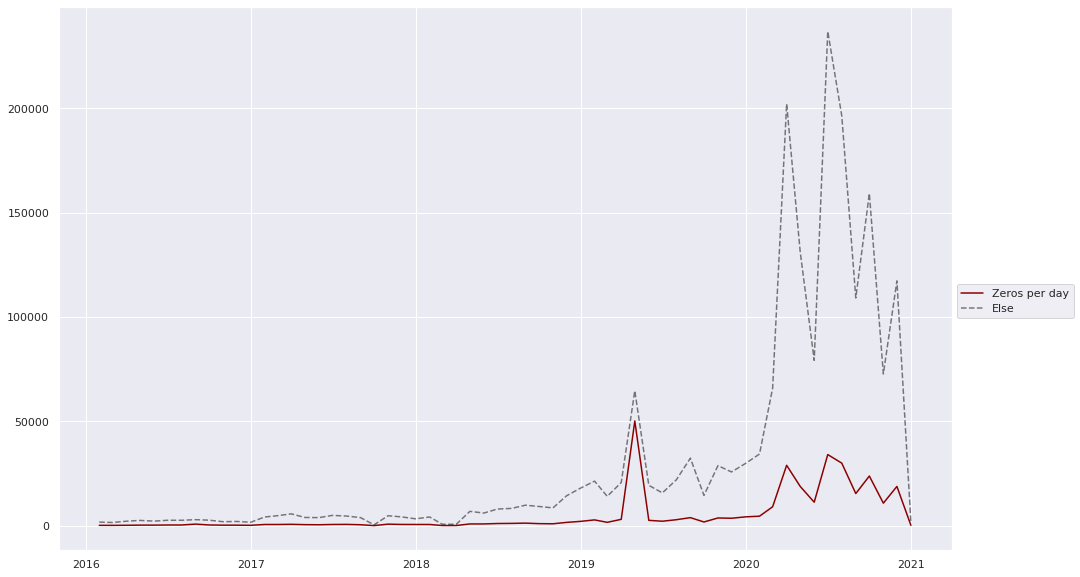

In [32]:
trng_z = df_training[df_training.num_words == 0].groupby(pd.Grouper(key='dt',freq='M'))['num_words'].count()
trng_rest = df_training[df_training.num_words != 0].groupby(pd.Grouper(key='dt',freq='M'))['num_words'].count()

_, ax = plt.subplots(1,1,figsize=(16,10))
ax.plot(trng_z.index, trng_z.values, color = 'darkred',marker='', linestyle='-', label='Zeros per day')
ax.plot(trng_rest.index, trng_rest.values, color='black', marker='',linestyle = '--', label ='Else', alpha=0.5)
plt.legend(loc='upper left', bbox_to_anchor=(1,0.5))
plt.show()

#graphing this montly as we are looking at randomly selected data over a 4 year period and a certain 'smoothing' will do this justice

We can see a huge spike in the first quarter of 2019, as well as an increase in the beginning of 2020 that corresponds to a large increase the total number of montly comments

#### Validation:

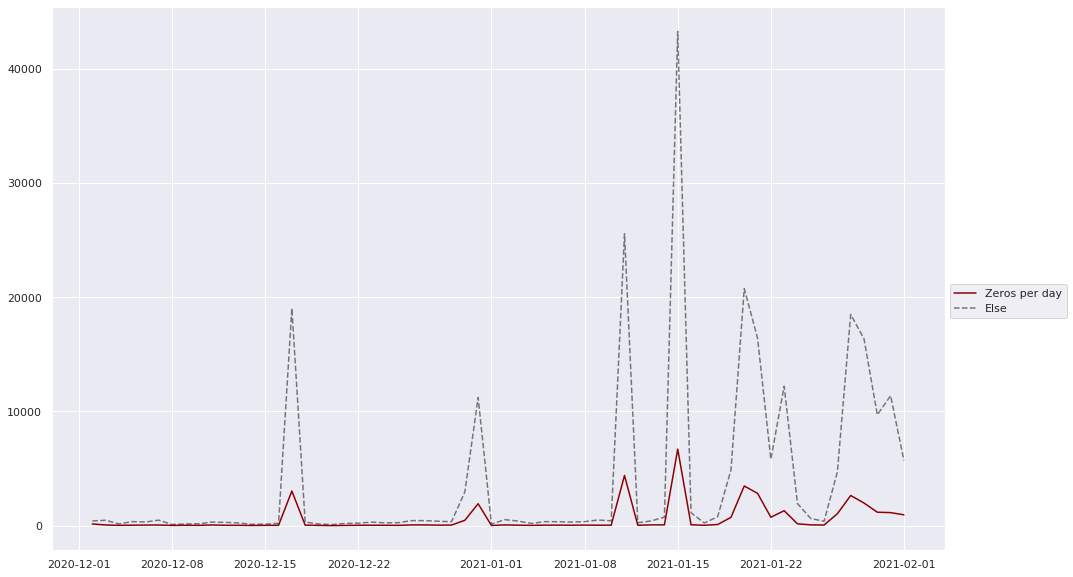

In [33]:
vld_z = df_validation[df_validation.num_words == 0].groupby(pd.Grouper(key='dt',freq='D'))['num_words'].count()
vld_rest = df_validation[df_validation.num_words != 0].groupby(pd.Grouper(key='dt',freq='D'))['num_words'].count()

_, ax = plt.subplots(1,1,figsize=(16,10))
ax.plot(vld_z.index, vld_z.values, color = 'darkred',marker='', linestyle='-', label='Zeros per day')
ax.plot(vld_rest.index, vld_rest.values, color='black', marker='',linestyle = '--', label ='Else', alpha=0.5)
plt.legend(loc='upper left', bbox_to_anchor=(1,0.5))
plt.show()

#graphing this by day as the time frame is much shorter and will yield more information this way

## Word length frequencies:


In [34]:
training_word_lens = []
for item in df_training.word_lens.values:
  training_word_lens.extend(item)

training_word_freq = {}
for item in training_word_lens:
  if item not in training_word_freq.keys():
    training_word_freq[item] = 1
  else:
    training_word_freq[item] +=1
print(training_word_freq)

{4: 4036786, 6: 1606865, 5: 2359266, 7: 1022869, 10: 265364, 9: 396181, 3: 1984122, 8: 712034, 2: 355755, 14: 22228, 13: 38636, 1: 12865, 11: 125481, 23: 1501, 12: 63303, 15: 11915, 18: 5306, 17: 5990, 16: 5903, 28: 1023, 19: 9415, 20: 1968, 21: 3817, 24: 744, 32: 662, 25: 1540, 27: 499, 22: 1576, 31: 582, 41: 122, 30: 155, 39: 125, 29: 439, 38: 112, 51: 83, 35: 428, 26: 383, 34: 162, 33: 185, 56: 2, 37: 40, 40: 29, 45: 114, 53: 12, 55: 18, 47: 73, 59: 15, 43: 103, 46: 11, 44: 44, 42: 28, 49: 41, 36: 40, 50: 6, 48: 9, 63: 10, 58: 1, 54: 13}


In [35]:
for key, item in sorted(training_word_freq.items(), key=lambda x: x[1], reverse=True):
  print(f'Percentage of words of length {key} in the training set is {item/len(training_word_lens):.2%}')

Percentage of words of length 4 in the training set is 30.92%
Percentage of words of length 5 in the training set is 18.07%
Percentage of words of length 3 in the training set is 15.20%
Percentage of words of length 6 in the training set is 12.31%
Percentage of words of length 7 in the training set is 7.83%
Percentage of words of length 8 in the training set is 5.45%
Percentage of words of length 9 in the training set is 3.03%
Percentage of words of length 2 in the training set is 2.72%
Percentage of words of length 10 in the training set is 2.03%
Percentage of words of length 11 in the training set is 0.96%
Percentage of words of length 12 in the training set is 0.48%
Percentage of words of length 13 in the training set is 0.30%
Percentage of words of length 14 in the training set is 0.17%
Percentage of words of length 1 in the training set is 0.10%
Percentage of words of length 15 in the training set is 0.09%
Percentage of words of length 19 in the training set is 0.07%
Percentage of

In [36]:
valid_word_lens = []
for item in df_validation.word_lens.values:
  valid_word_lens.extend(item)

valid_word_freq = {}
for item in valid_word_lens:
  if item not in valid_word_freq.keys():
    valid_word_freq[item] = 1
  else:
    valid_word_freq[item] +=1
print(valid_word_freq)

{7: 127146, 4: 500339, 3: 260647, 2: 44107, 6: 277410, 5: 320795, 8: 107570, 1: 1625, 13: 5290, 9: 48506, 12: 9962, 17: 473, 21: 312, 10: 32998, 11: 16488, 15: 1810, 28: 190, 27: 150, 14: 3483, 34: 21, 20: 604, 18: 557, 19: 268, 16: 835, 22: 199, 23: 238, 24: 375, 26: 123, 31: 47, 39: 6, 33: 119, 30: 32, 25: 139, 29: 27, 35: 6, 32: 4, 37: 4, 43: 1}


In [37]:
for key, item in sorted(valid_word_freq.items(), key=lambda x: x[1], reverse=True):
  print(f'Percentage of words of length {key} in the training set is {item/len(valid_word_lens):.2%}')

Percentage of words of length 4 in the training set is 28.38%
Percentage of words of length 5 in the training set is 18.20%
Percentage of words of length 6 in the training set is 15.74%
Percentage of words of length 3 in the training set is 14.79%
Percentage of words of length 7 in the training set is 7.21%
Percentage of words of length 8 in the training set is 6.10%
Percentage of words of length 9 in the training set is 2.75%
Percentage of words of length 2 in the training set is 2.50%
Percentage of words of length 10 in the training set is 1.87%
Percentage of words of length 11 in the training set is 0.94%
Percentage of words of length 12 in the training set is 0.57%
Percentage of words of length 13 in the training set is 0.30%
Percentage of words of length 14 in the training set is 0.20%
Percentage of words of length 15 in the training set is 0.10%
Percentage of words of length 1 in the training set is 0.09%
Percentage of words of length 16 in the training set is 0.05%
Percentage of

In both sets four letter words are the most frequently occurring. To train the LDA model later the incredibly infrequent words will likely be removed i.e. words that appear in less than 10% of the posts as well as the hyper frequent words i.e. those words that appear in more than 90% of the posts for each. From the remaining words in the training set the topics will be determined.

### Remove zero-posts:

In [38]:
df_training = df_training[df_training.num_words != 0]
df_alidation = df_validation[df_validation.num_words != 0]

In [39]:
df_training.shape

(1883979, 6)

In [40]:
df_validation.shape

(282174, 6)

The training and validation split is 87/13 at this point.


## Sentiment analysis:


In [41]:
df_training_grouped_id = df_training.groupby('id')['preprocessed'].sum()
df_validation_grouped_id = df_validation.groupby('id')['preprocessed'].sum()

In [42]:
df_training_grouped_id = df_training_grouped_id.reset_index()
df_validation_grouped_id = df_validation_grouped_id.reset_index()

Considering how many of the individual posts/comments are short, we can increase the length of each text element for the models to learn on by grouping them on the post id into a single 'document'.

In [43]:
df_training_grouped_id['preprocessed_str'] = [' '.join(map(str,l)) for l in df_training_grouped_id['preprocessed']]
df_training_grouped_id.head()

,id,preprocessed,preprocessed_str
0,3z02a1,"[time, share, secret, money, make, little, bnhlf]",time share secret money make little bnhlf
1,3z1ll5,"[hear, suck, try, find, broker, good, go, brok...",hear suck try find broker good go broker try t...
2,3zc3g6,"[probably, try, make, day, trade, mro, assume,...",probably try make day trade mro assume crude c...
3,3zc8az,"[case, wonder, happen]",case wonder happen
4,3zcunk,"[oil, slip, make, sound, bearish, limit, set, ...",oil slip make sound bearish limit set oil clos...


In [44]:
df_training_grouped_id['sentiment'] = df_training_grouped_id['preprocessed_str'].apply(lambda x: TextBlob(x).sentiment.polarity)

In [45]:
df_training_grouped_id['objective'] = df_training_grouped_id['preprocessed_str'].apply(lambda x: TextBlob(x).sentiment.subjectivity)

In [46]:
df_training_grouped_id

,id,preprocessed,preprocessed_str,sentiment,objective
0,3z02a1,"[time, share, secret, money, make, little, bnhlf]",time share secret money make little bnhlf,-0.293750,0.600000
1,3z1ll5,"[hear, suck, try, find, broker, good, go, brok...",hear suck try find broker good go broker try t...,0.158824,0.488235
2,3zc3g6,"[probably, try, make, day, trade, mro, assume,...",probably try make day trade mro assume crude c...,0.084910,0.477428
3,3zc8az,"[case, wonder, happen]",case wonder happen,0.000000,0.000000
4,3zcunk,"[oil, slip, make, sound, bearish, limit, set, ...",oil slip make sound bearish limit set oil clos...,0.294286,0.430714
...,...,...,...,...,...
55039,k4vztx,"[almost, recover, loss, back]",almost recover loss back,0.000000,0.000000
55040,k4w3dx,"[never, think, buy, pyramid_scheme, yet]",never think buy pyramid_scheme yet,0.000000,0.000000
55041,k4w5xc,"[move, tomorrow, good, tomorrow, guy, buy, sit...",move tomorrow good tomorrow guy buy sit sideli...,-0.040000,0.366667
55042,k4w6of,"[retard, ban, discord]",retard ban discord,-0.900000,1.000000


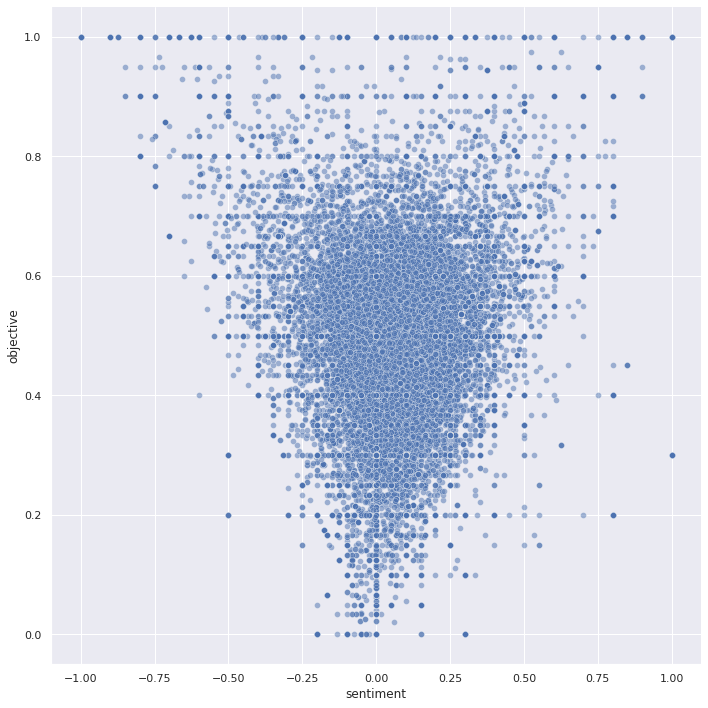

In [47]:
sns.relplot(data=df_training_grouped_id, x='sentiment', y='objective', height=10, alpha=0.5)
plt.show()

In [48]:
df_validation_grouped_id['preprocessed_str'] = [' '.join(map(str,l)) for l in df_validation_grouped_id['preprocessed']]

In [49]:
df_validation_grouped_id['sentiment'] = df_validation_grouped_id['preprocessed_str'].apply(lambda x: TextBlob(x).sentiment.polarity)
df_validation_grouped_id['objective'] = df_validation_grouped_id['preprocessed_str'].apply(lambda x: TextBlob(x).sentiment.subjectivity)

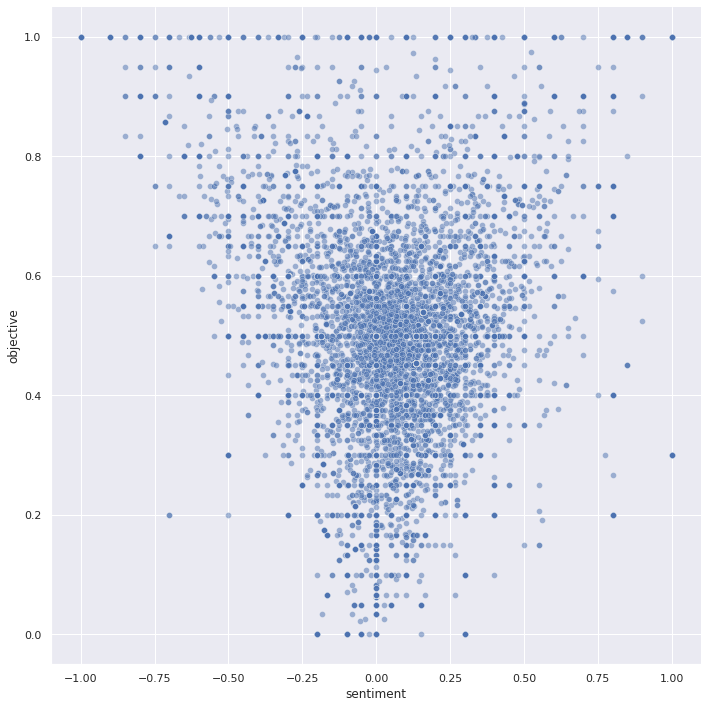

In [50]:
sns.relplot(data=df_validation_grouped_id, x='sentiment', y='objective', height=10, alpha=0.5)
plt.show()

In [51]:
df_validation_grouped_id

,id,preprocessed,preprocessed_str,sentiment,objective
0,k4wp1b,"[happen, taxis, report, huge, fucking, loss, g...",happen taxis report huge fucking loss get mone...,-0.018371,0.448674
1,k4wst9,"[get, waste, care, pay, instagram, guru, advice]",get waste care pay instagram guru advice,-0.200000,0.000000
2,k4xit2,"[drop, lot, thought]",drop lot thought,0.000000,0.000000
3,k4xm36,"[comment, thread, reply, top, level, comment, ...",comment thread reply top level comment reply g...,0.012500,0.575000
4,k4xpgy,"[decimal, place, know, buy, stock, decimal, pl...",decimal place know buy stock decimal place pri...,-0.200000,0.300000
...,...,...,...,...,...
29665,lagtd0,[happen],happen,0.000000,0.000000
29666,lagtxo,"[possible, ladder]",possible ladder,0.000000,1.000000
29667,lagu6e,"[short, seller, attack, covid, company, try, l...",short seller attack covid company try life let...,0.000000,0.300000
29668,lagu8d,"[go, listen, weak, hearted, people, sell, amc,...",go listen weak hearted people sell amc huh,-0.375000,0.625000


When combining the comments and posts together into single documents with greater length and more information the ration between the training set and the validation sets becomes: 65/35.

Further more, we see nearly identical scatters between the training and validation sets. We cannot really say anything conclusively about the scatter of the data since it appears to be relatively symmetrical about neutral-line for sentimentality, and with the majority of the cluster being closer the middle of the subjectivity scale.

now that we have decided to combine all of the comments and posts on the post id to create longer texts let's revisit the document length frequencies:

## Combined Document Frequencies:

In [60]:
df_training_grouped_id['dt'] = df_training.groupby('id')['dt'].min().values
df_validation_grouped_id['dt'] = df_validation.groupby('id')['dt'].min().values

In [61]:
df_training_grouped_id.head()

,id,preprocessed,preprocessed_str,sentiment,objective,dt
0,3z02a1,"[time, share, secret, money, make, little, bnhlf]",time share secret money make little bnhlf,-0.293750,0.600000,2016-01-01
1,3z1ll5,"[hear, suck, try, find, broker, good, go, brok...",hear suck try find broker good go broker try t...,0.158824,0.488235,2016-01-01
2,3zc3g6,"[probably, try, make, day, trade, mro, assume,...",probably try make day trade mro assume crude c...,0.084910,0.477428,2016-01-03
3,3zc8az,"[case, wonder, happen]",case wonder happen,0.000000,0.000000,2016-01-04
4,3zcunk,"[oil, slip, make, sound, bearish, limit, set, ...",oil slip make sound bearish limit set oil clos...,0.294286,0.430714,2016-01-03


In [62]:
df_training_grouped_id['text_len'] = [len(item) for item in df_training_grouped_id['preprocessed']]
df_validation_grouped_id['text_len'] = [len(item) for item in df_validation_grouped_id['preprocessed']]

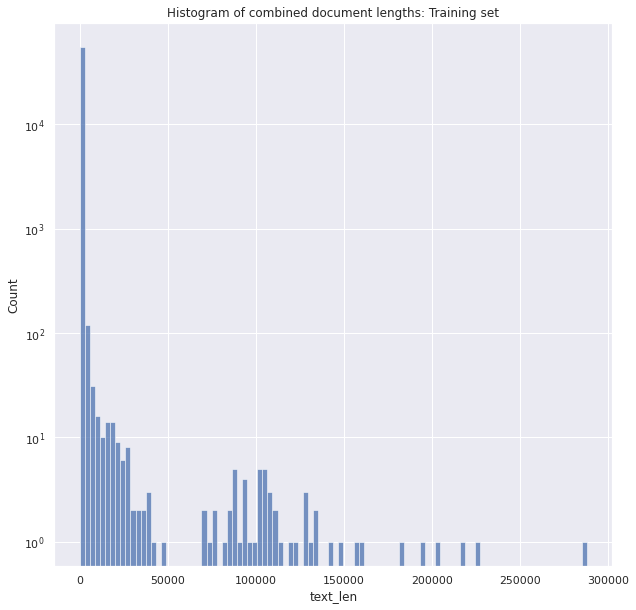

In [63]:
_, ax = plt.subplots(1,1,figsize=(10,10))

sns.histplot(data=df_training_grouped_id, x='text_len', ax=ax, bins=100)
ax.set_yscale('log')
ax.set_title('Histogram of combined document lengths: Training set')
plt.show()

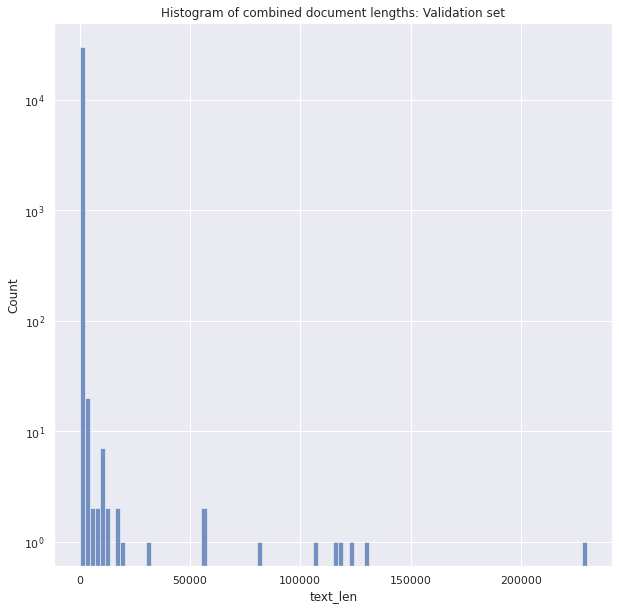

In [64]:
_, ax = plt.subplots(1,1,figsize=(10,10))

sns.histplot(data=df_validation_grouped_id, x='text_len', ax=ax, bins=100)
ax.set_yscale('log')
ax.set_title('Histogram of combined document lengths: Validation set')
plt.show()

Both sets are again highly right skewed with some significant outliers. But it is important to note that by increasing the length of the documents and reducing the total number of documents that we are making the detection of topics by an LDA model easier.

### Scatter Sentiment and Document Length:

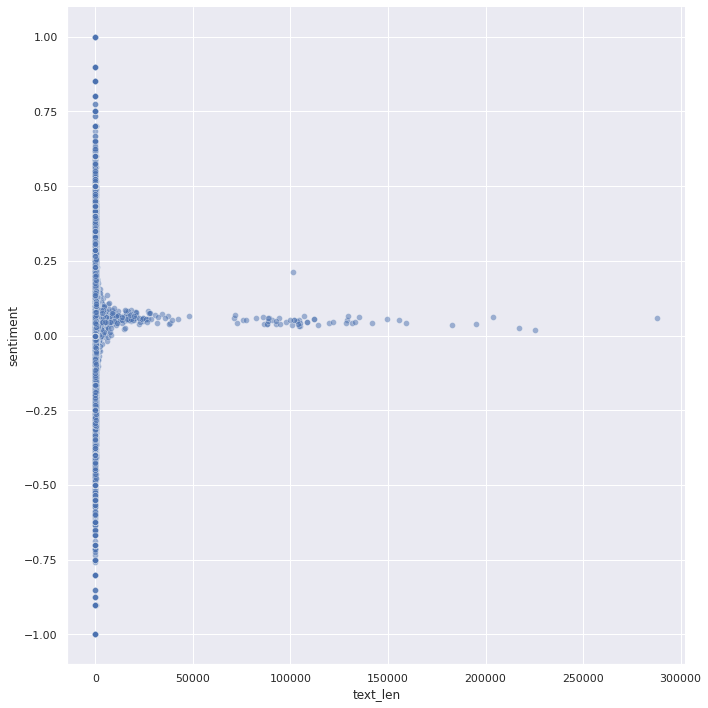

In [82]:
sns.relplot(kind='scatter', data=df_training_grouped_id, x='text_len', y='sentiment', height=10, alpha=0.5);

In [108]:
def get_id_comment_count(frame):
  temp_frame = frame.copy()
  temp_frame['binary'] = np.where(temp_frame.thetype == 'post', 0, 1)
  results = temp_frame.groupby('id')['binary'].sum().values
  return results
  

In [110]:
df_training_grouped_id['num_comments'] = get_id_comment_count(df_training)
df_validation_grouped_id['num_comments'] = get_id_comment_count(df_validation)

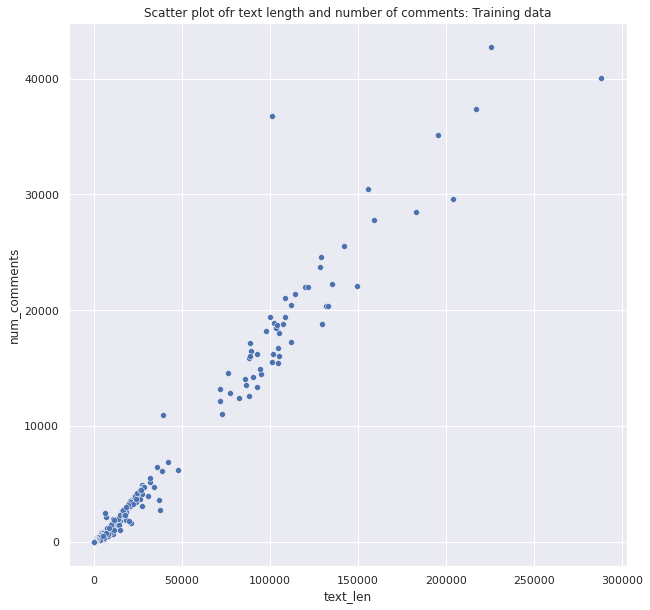

In [113]:
_, ax = plt.subplots(1,1,figsize=(10,10))

sns.scatterplot(data=df_training_grouped_id, x='text_len', y='num_comments')
ax.set_title('Scatter plot ofr text length and number of comments: Training data')
plt.show()

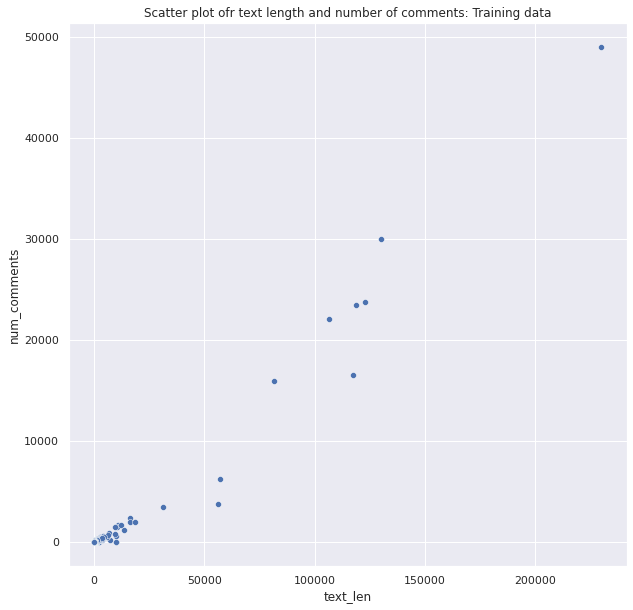

In [114]:
_, ax = plt.subplots(1,1,figsize=(10,10))

sns.scatterplot(data=df_validation_grouped_id, x='text_len', y='num_comments')
ax.set_title('Scatter plot ofr text length and number of comments: Training data')
plt.show()

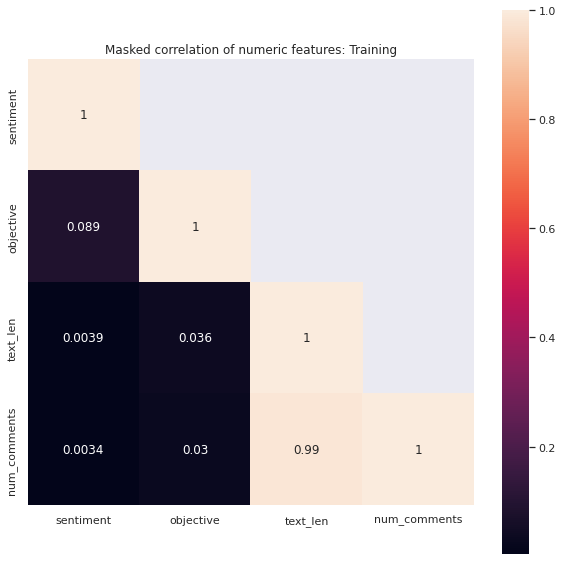

In [116]:
_, ax = plt.subplots(1,1,figsize=(10,10))

c = df_training_grouped_id.corr()
mask = np.triu(np.ones_like(c),k=1)
sns.heatmap(c, mask=mask, annot=True, square=True, ax=ax)
ax.set_title('Masked correlation of numeric features: Training')
plt.show()

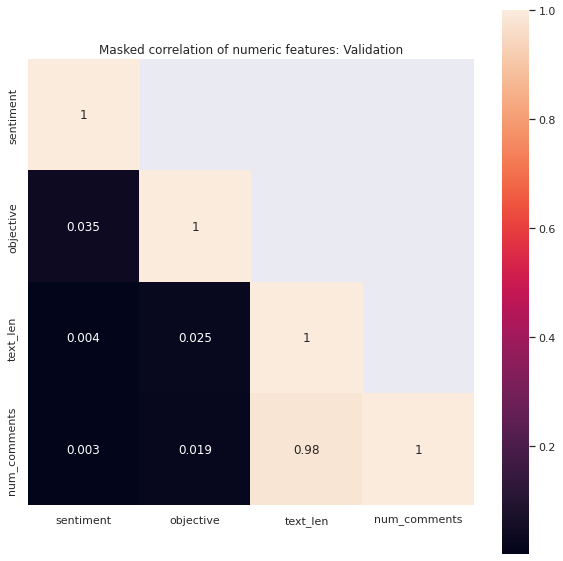

In [117]:
_, ax = plt.subplots(1,1,figsize=(10,10))

c = df_validation_grouped_id.corr()
mask = np.triu(np.ones_like(c),k=1)
sns.heatmap(c, mask=mask, annot=True, square=True, ax=ax)
ax.set_title('Masked correlation of numeric features: Validation')
plt.show()

From the features that have been investigated we see a strong relationship between the number of comments in each document for both the training and vaidation set. It is also apparent that there are very week relationships between the other features in the data sets. 

## 100 most common words by set:

In [65]:
all_words_training = []
for document in df_training_grouped_id['preprocessed']:
  all_words_training += document


all_words_validation = []
for document in df_validation_grouped_id['preprocessed']:
  all_words_validation += document

In [66]:
mc_training = FreqDist(all_words_training).most_common(100)
mc_validation = FreqDist(all_words_validation).most_common(100)

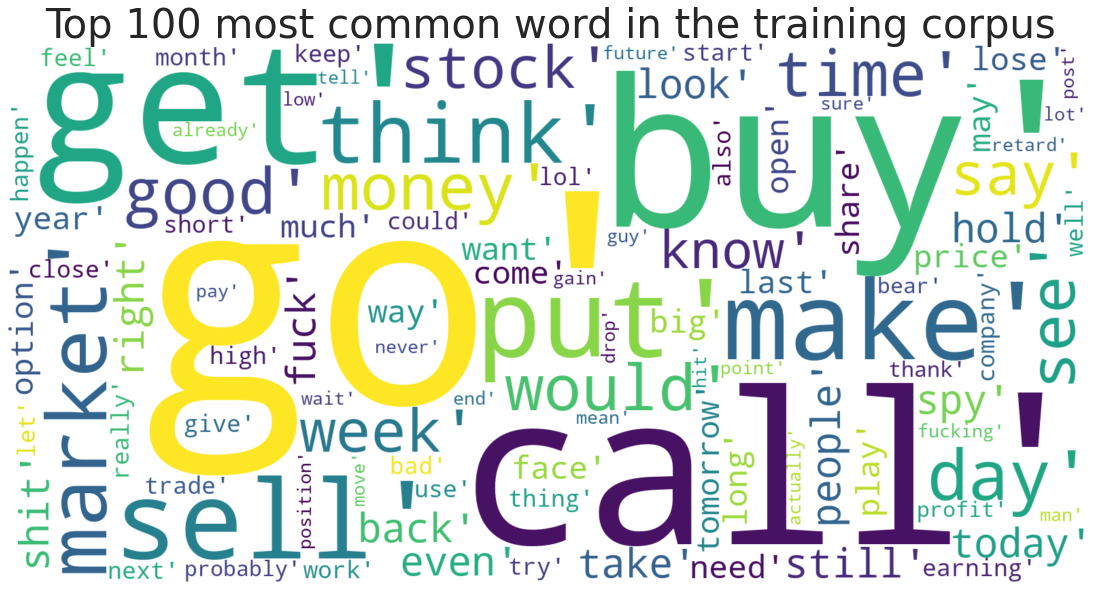

In [67]:
wdcld_training = wordcloud.WordCloud(width=1600, height=800, background_color='white')\
.generate(str(mc_training))

fig = plt.figure(figsize=(30,10), facecolor='white')
plt.imshow(wdcld_training, interpolation='bilinear')
plt.axis('off')
plt.title('Top 100 most common word in the training corpus', fontsize=40)

plt.show()

There is a plethora of language in the top 100 most common words from the training corpus that relates to the buying and selling of stocks. Some key words that filter in are: option, call, hold, short, long, sell, put. Thus the later modeling will likely be able to determine appropriate topics.

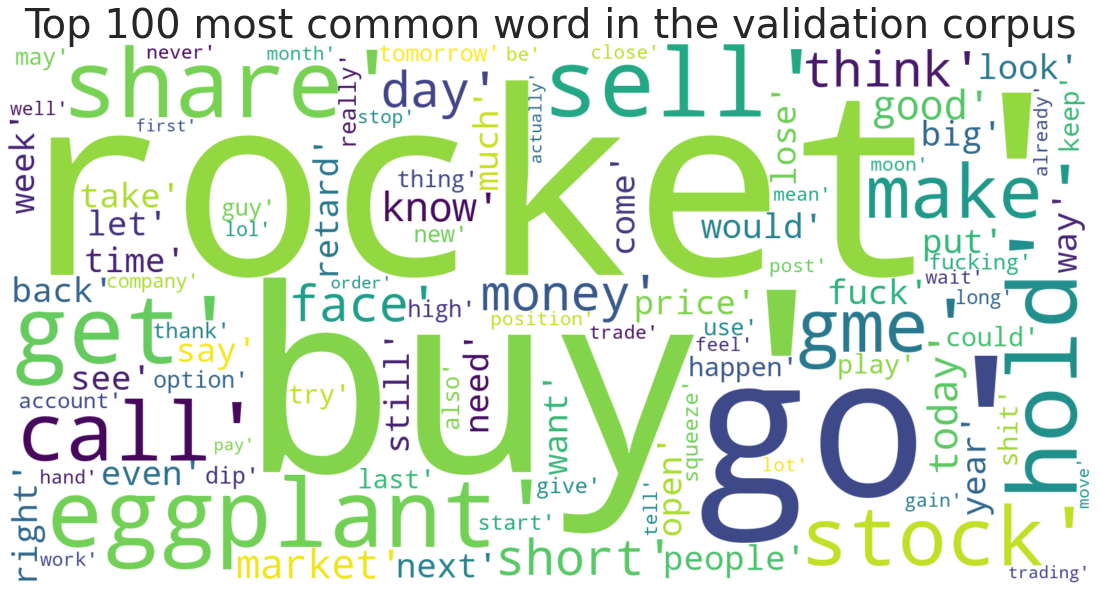

In [68]:
wdcld_validation = wordcloud.WordCloud(width=1600, height=800, background_color='white')\
.generate(str(mc_validation))

fig = plt.figure(figsize=(30,10), facecolor='white')
plt.imshow(wdcld_validation, interpolation='bilinear')
plt.axis('off')
plt.title('Top 100 most common word in the validation corpus', fontsize=40)
plt.show()

We see that the validation set contains a similar set of top 100 words. some noteable inclusions here are eggplant and rocket which are direction encodings of emojis to their text descriptions. More important/interesting would be the inclusions of: gme, option, buy, squeeze, short, hold, call. It is language that is nearly identical to the training set. `

In [118]:
df_training_grouped_id.to_csv(gd_loc/'training_combined.csv')
df_validation_grouped_id.to_csv(gd_loc/'validation_combined.csv')